### **INTRODUCTION**

Over the past 20 years, there has been a noticeable change in the retail car-buying process. Change has been historically slow, but in the last two years, it has accelerated because of major supply chain problems and changing consumer demands. Maintaining strong sales performance allows dealerships to gain a competitive edge, attract potential customers, and establish themselves as industry leaders in their respective markets.

This project aims to analyze sales data from a dealership over a specified time period to gain insights into various aspects of sales performance, customer preferences, and market trends. By leveraging comprehensive EDA techniques, I seek to uncover valuable insights that can inform strategic decision-making, drive revenue growth, and enhance overall business performance.

### **ABOUT DATA SET**

This dataset contains information on car sales from a car dealership over the course of a year. The dataset includes the following columns:

-- Date: The date of the car sale

-- Salesperson: The name of the salesperson who made the sale
    
-- Customer Name: The name of the customer who purchased the car

-- Car Make: The make of the car that was purchased

-- Car Model: The model of the car that was purchased

-- Car Year: The year of the car that was purchased

-- Sale Price: The sale price of the car in USD

-- Commission Rate: The commission rate paid to the salesperson on the sale

-- Commission Earned: The amount of commission earned by the salesperson on the sale

In [3]:
## importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
## reading the data

df =pd.read_csv('car_sales_data.csv')
df.tail()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
2499995,2022-05-26,Isabella Moore,Shirley Lee,Chevrolet,Silverado,2021,49823,0.062977,3137.70
2499996,2022-10-03,Kimberly Snow,Tara Rodgers,Ford,F-150,2022,18803,0.068339,1284.97
2499997,2022-06-07,Jessica Young,Jennifer Moore,Chevrolet,Civic,2010,30863,0.088915,2744.19
2499998,2023-02-15,Donald Barber,Ashley Diaz,Honda,Silverado,2014,26125,0.088260,2305.80
2499999,2023-03-24,Kayla Fowler,Nathan Thompson,Honda,Civic,2010,20762,0.137105,2846.57


#### **EDA**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date               object 
 1   Salesperson        object 
 2   Customer Name      object 
 3   Car Make           object 
 4   Car Model          object 
 5   Car Year           int64  
 6   Sale Price         int64  
 7   Commission Rate    float64
 8   Commission Earned  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 171.7+ MB


In [4]:
df.isnull().sum()

Date                 0
Salesperson          0
Customer Name        0
Car Make             0
Car Model            0
Car Year             0
Sale Price           0
Commission Rate      0
Commission Earned    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.shape

(2500000, 9)

In [8]:
df.describe()

,Car Year,Sale Price,Commission Rate,Commission Earned
count,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
mean,2.015996e+03,3.001218e+04,9.998766e-02,3.001005e+03
std,3.739132e+00,1.154514e+04,2.887202e-02,1.481467e+03
min,2.010000e+03,1.000000e+04,5.000014e-02,5.013400e+02
25%,2.013000e+03,2.001900e+04,7.496450e-02,1.821710e+03
50%,2.016000e+03,3.000600e+04,1.000058e-01,2.741910e+03
75%,2.019000e+03,4.002200e+04,1.250065e-01,3.978142e+03
max,2.022000e+03,5.000000e+04,1.500000e-01,7.494530e+03


The average sales price is 30,018.37 dollars as the standard deviation is 11,543.807 dollars. This means that the sales prices exhibit a considerable degree of variability thus sales prices are widely spread out from the average; some sales prices are significantly higher or lower than the average sales price of $30,018.37. This variability indicates that there is a range of prices, rather than all sales being close to the average.

In [8]:
df.columns

Index(['Date', 'Salesperson', 'Customer Name', 'Car Make', 'Car Model',
       'Car Year', 'Sale Price', 'Commission Rate', 'Commission Earned'],
      dtype='object')

In [9]:
df.dtypes

Date                  object
Salesperson           object
Customer Name         object
Car Make              object
Car Model             object
Car Year               int64
Sale Price             int64
Commission Rate      float64
Commission Earned    float64
dtype: object

In [9]:
##changing date time data type
df['Date'] = pd.to_datetime(df['Date'])


In [14]:
#extracting month from date

df['Month'] =df['Date'].dt.month


In [15]:
#extracting year from date

df['Year'] =df['Date'].dt.year

In [20]:
#Best Sales month over time

df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby(['Month', 'Year'])['Sale Price'].sum()
month, year = max_sales_month
print(f"The highest sales were recorded in Month {month}, Year {year}.")

The highest sales were recorded in Month 12, Year 2022.


In [21]:
## checking for the total sales per month over the period

monthly_sales = (df.groupby(['Year', 'Month'])['Sale Price'].sum().reset_index())
monthly_sales_sorted = (monthly_sales.sort_values(['Year', 'Sale Price'], ascending=[True, False]))
monthly_sales_sorted

,Year,Month,Sale Price
7,2022,12,6385067556
5,2022,10,6378840202
3,2022,8,6354441192
0,2022,5,6354253868
2,2022,7,6348409539
1,2022,6,6162247177
4,2022,9,6138540711
6,2022,11,6129814538
10,2023,3,6347385901
8,2023,1,6346868533


#### **Sales Trend over Time**

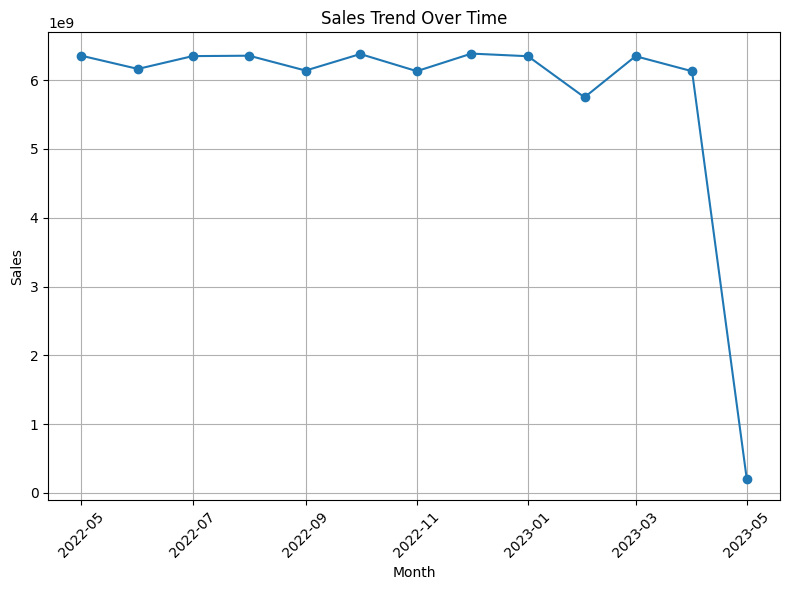

In [25]:
monthly_sales = (df.groupby(['Year', 'Month'])['Sale Price'].sum().reset_index())

monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

monthly_sales = monthly_sales.sort_values('Date')

plt.figure(figsize=(8,6))
plt.plot(monthly_sales['Date'],monthly_sales['Sale Price'],marker='o')
plt.grid()
plt.xticks(rotation=45)
plt.title("Sales Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


From this visual we can observe that the highest sale was was recorded in December 2022, however sales exhibit relatively consistent levels with occasional fluctuations, except for a significant drop in May 2023.

#### **Best 10 Sales Persons vs Bottom 10 Sales Persons**

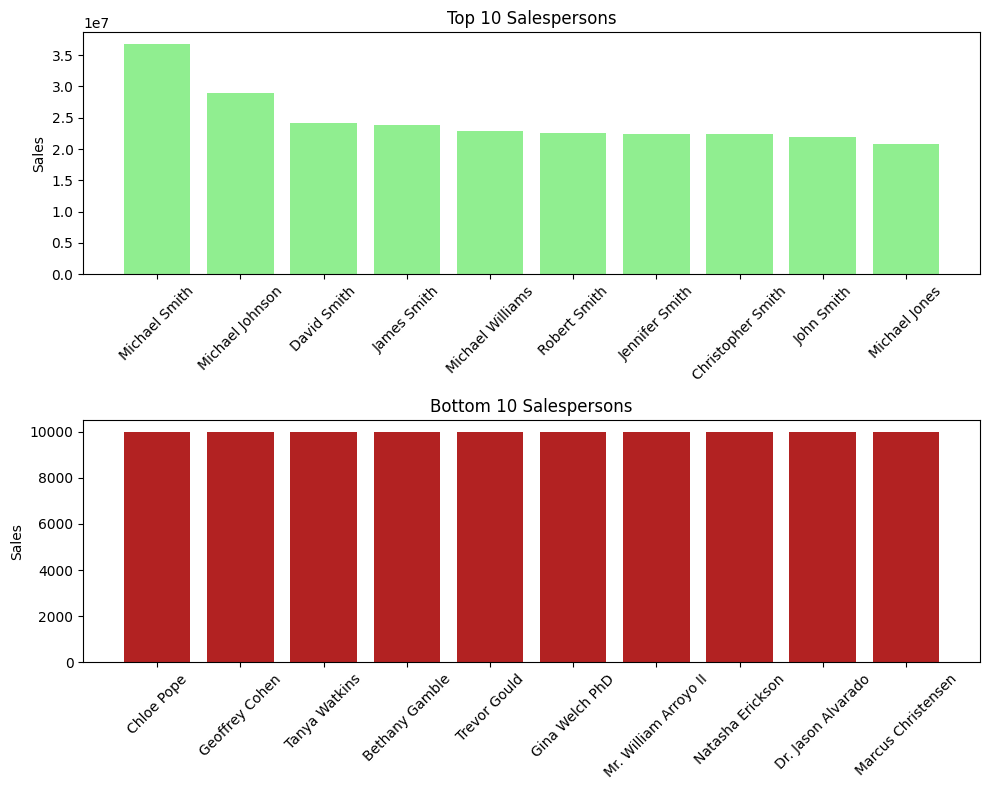

In [28]:

salesperson_sales = df.groupby('Salesperson')['Sale Price'].sum().sort_values(ascending=False)

top10 = salesperson_sales.head(10)
bottom10 = salesperson_sales.tail(10)


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot top 10 salespersons
axes[0].bar(top10.index, top10.values, color='LightGreen')
axes[0].set_title('Top 10 Salespersons')
axes[0].set_ylabel('Sales')
axes[0].tick_params(axis='x', rotation=45)

# Plot bottom 10 salespersons
axes[1].bar(bottom10.index, bottom10.values, color='FireBrick')
axes[1].set_title('Bottom 10 Salespersons')
axes[1].set_ylabel('Sales')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The top 10 performing salespersons have demonstrated exceptional sales performance, collectively contributing significant revenue to the organization.Total sales figures for this group range from 8.7 million dollars to over 16 million dollars, highlighting their substantial impact on overall sales success.

The bottom 10 performing salespersons have contributed less sales figures.Total sales figures for this group ranges from 10,000 dollars to 10,002 dollars, suggesting a relatively low impact on overall sales success compared to top performers indicating a need for improvement in their sales performance.

### **Car With The Most Sales**

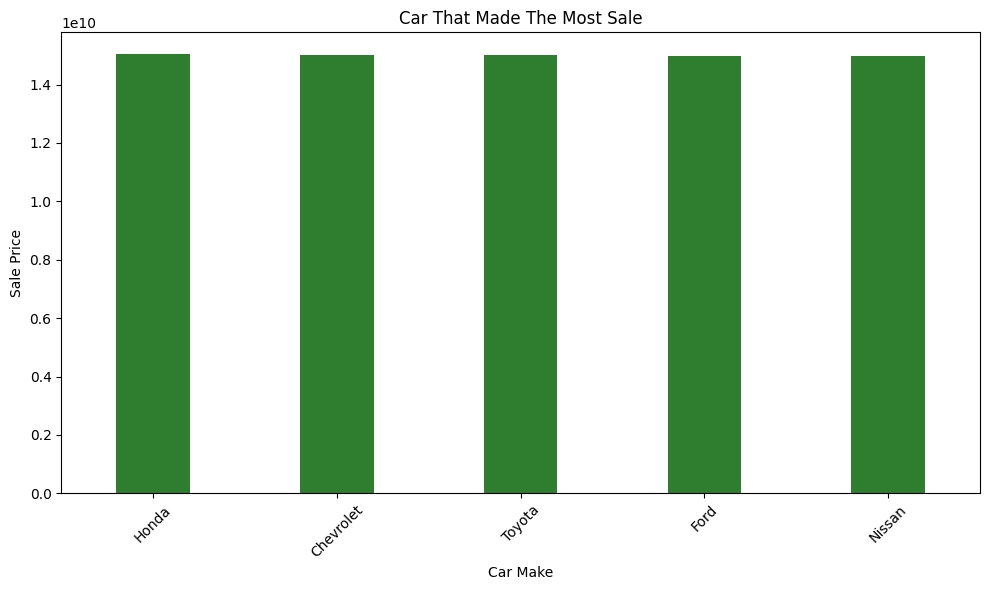

In [32]:
Car_Sales = df.groupby('Car Make')['Sale Price'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x="Car Make", y="Sale Price", data=Car_Sales, color="forestgreen", width=0.4 )
plt.xlabel("Car Make")
plt.ylabel("Sale Price")
plt.title("Car That Made The Most Sale")
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

Honda made the most sale

### **Most Preffered Car Model VS Average Sales Price of Car Models.**

In [19]:
df['Car Model'].unique()

array(['Altima', 'F-150', 'Civic', 'Silverado', 'Corolla'], dtype=object)

In [47]:
popular_car_models = df['Car Model'].value_counts().sort_values(ascending=False)

# average sale price for each car model
average_sale_price = df.groupby('Car Model')['Sale Price'].mean().sort_values(ascending=False)
print(popular_car_models)
print(average_sale_price)

Car Model
Silverado    500842
Civic        500498
Corolla      500162
F-150        499679
Altima       498819
Name: count, dtype: int64
Car Model
Silverado    30030.179052
Corolla      30023.817657
Altima       30022.035803
F-150        29995.522253
Civic        29989.340197
Name: Sale Price, dtype: float64


C:\Users\Pratik\AppData\Local\Temp\ipykernel_32428\875398869.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_sale_price.index, y=average_sale_price.values, palette=palette)


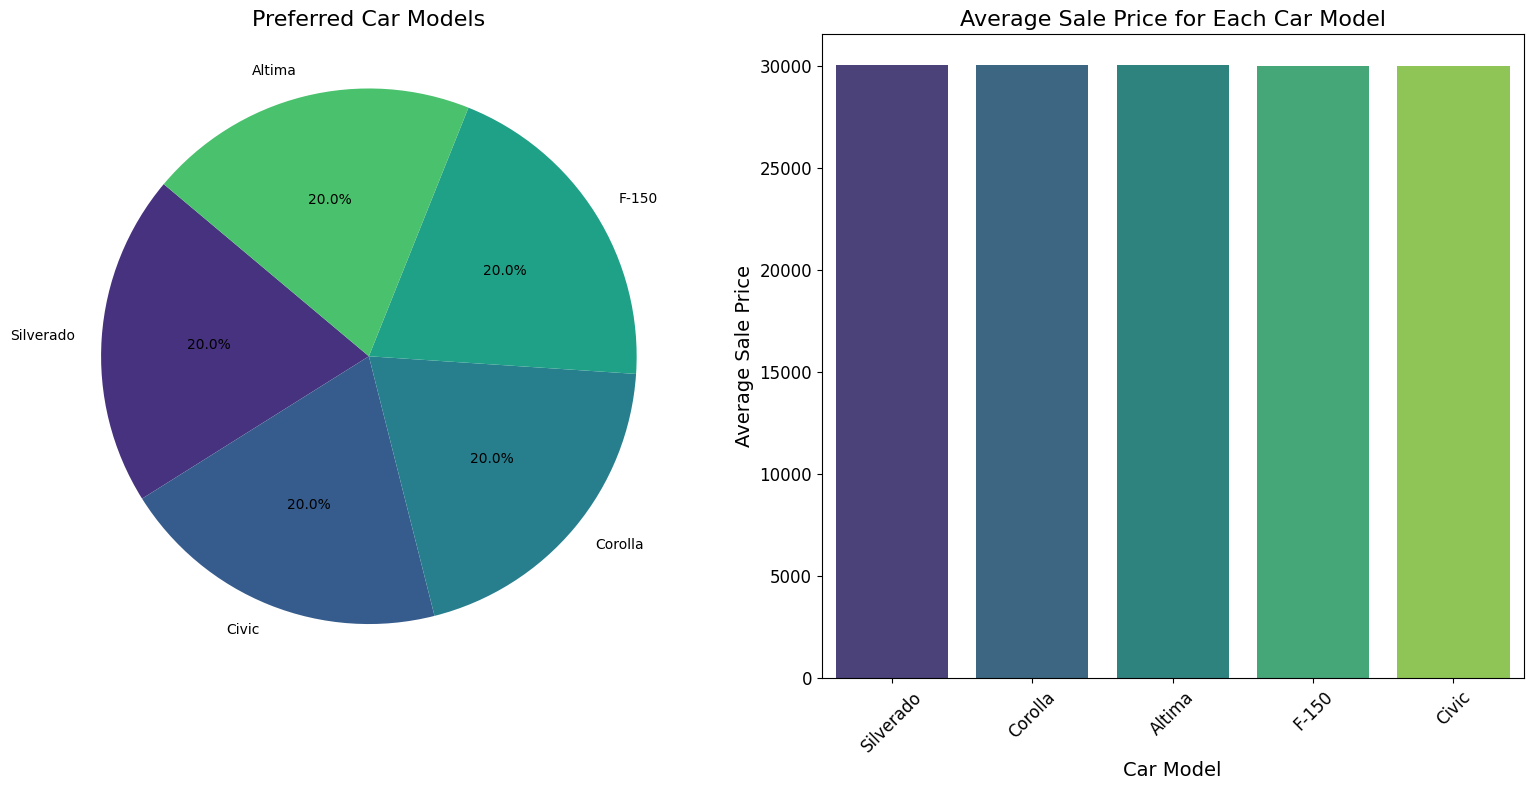

In [48]:

palette = "viridis"

plt.figure(figsize=(16, 8))
 ##pie chart
plt.subplot(1, 2, 1)  
plt.pie(popular_car_models, labels=popular_car_models.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette(palette))
plt.title('Preferred Car Models', fontsize=16)  
plt.axis('equal')  
plt.tick_params(labelsize=12)  

# bar chart 
plt.subplot(1, 2, 2)  
sns.barplot(x=average_sale_price.index, y=average_sale_price.values, palette=palette)
plt.title('Average Sale Price for Each Car Model', fontsize=16)  
plt.xlabel('Car Model', fontsize=14)  
plt.ylabel('Average Sale Price', fontsize=14)  
plt.xticks(rotation=45)
plt.tick_params(labelsize=12) 

plt.tight_layout()
plt.show()


Based on the analysis, it is evident that Silverado emerges as the most preferred car model among customers, with a sales count of 210,257 units sold. Following closely behind are the Civic, F-150, Corolla, and Altima models, with counts ranging around the 209,000 mark.

Despite Silverado's popularity in terms of sales volume, the Corolla model stands out with the highest average sale price of $30,056.04. This indicates that while Silverado may be the preferred choice among customers in terms of sheer numbers, the Corolla commands a higher price point on average, suggesting potential higher profit margins for salespersons and dealerships.

It's worth noting that although the Corolla boasts the highest average sale price, its sales count is lower compared to the Silverado, indicating different customer preferences and market dynamics for each model.

### **Is there a correlation between  commission rate and commission earned?**

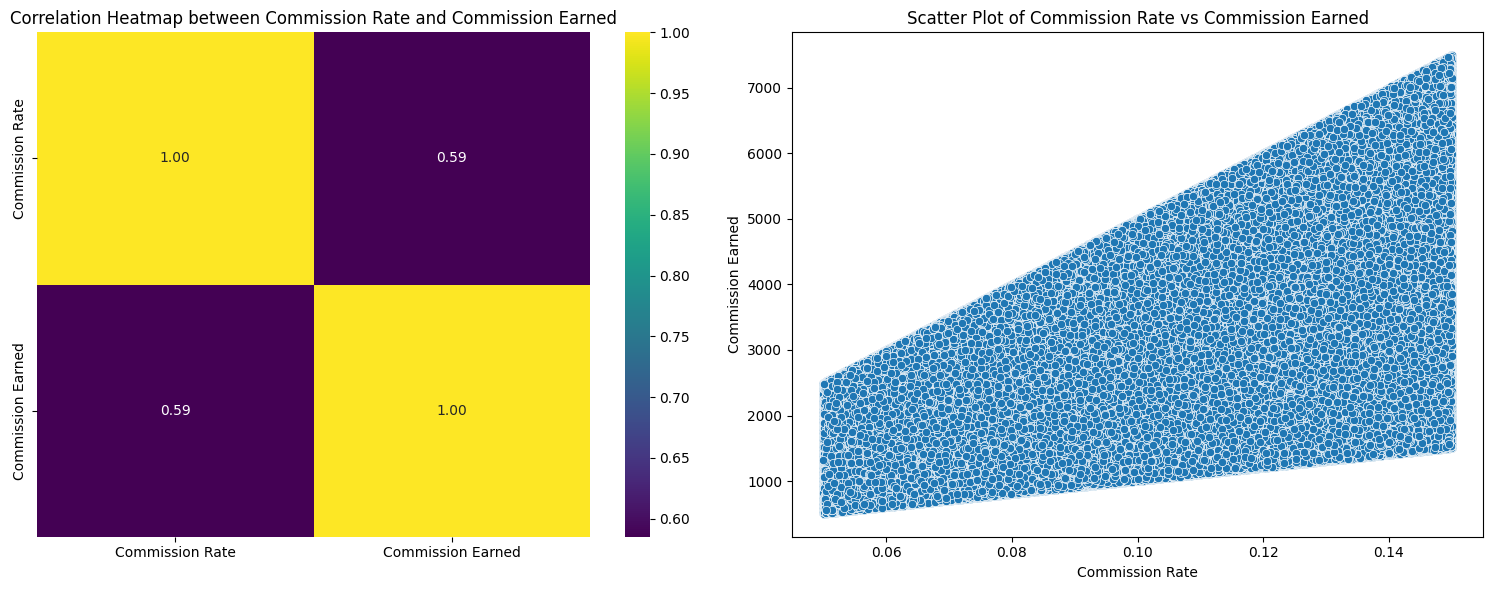

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Heat Map
sns.heatmap(df[['Commission Rate', 'Commission Earned']].corr(), annot=True, cmap='viridis', fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation Heatmap between Commission Rate and Commission Earned')

# Scatter Plot
sns.scatterplot(x='Commission Rate', y='Commission Earned', data=df, ax=axes[1])
axes[1].set_xlabel('Commission Rate')
axes[1].set_ylabel('Commission Earned')
axes[1].set_title('Scatter Plot of Commission Rate vs Commission Earned')

plt.tight_layout()
plt.show()


A correlation coefficient of 0.59 suggests a moderate positive linear relationship, indicating that as the commission rate increases, the commission earned tends to increase as well, and vice versa.
However, it's important to note that correlation does not imply causation as other factors may be influencing the relationship between commission rate and commission earned, and further analysis would be needed to determine causality.

### **Is there a relationship between the car year and the sale price?**

In [23]:
cor = df['Car Year'].corr(df['Sale Price']).round(2)
cor

-0.0

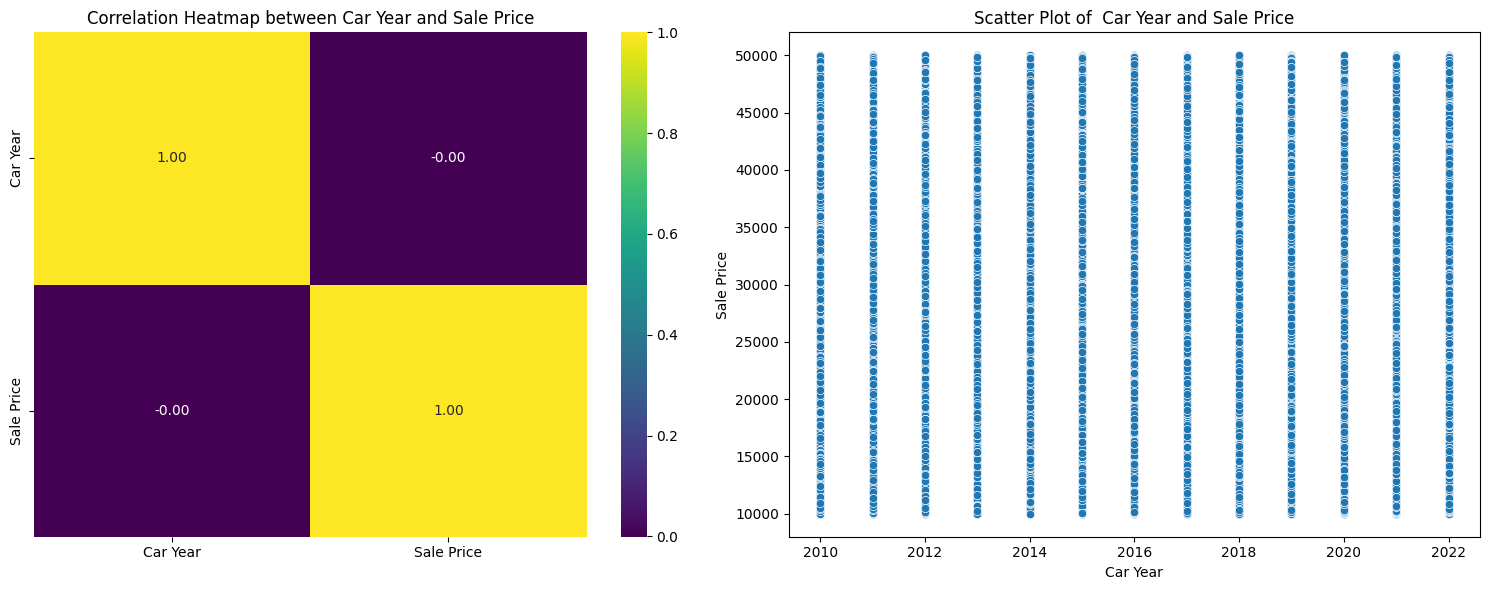

In [24]:

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Heat Map
sns.heatmap(df[['Car Year', 'Sale Price']].corr(), annot=True, cmap='viridis', fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation Heatmap between Car Year and Sale Price')

# Scatter Plot
sns.scatterplot(x='Car Year', y='Sale Price', data=df, ax=axes[1])
axes[1].set_xlabel('Car Year')
axes[1].set_ylabel('Sale Price')
axes[1].set_title('Scatter Plot of  Car Year and Sale Price')

plt.tight_layout()
plt.show()

This suggests a  very weak negative correlation between car year and sale price, suggesting that the year the car was made does not necessarily affect the sale price of the car. 

#### **Top 10 Customers based on Total amount Spent on Car Purchases**

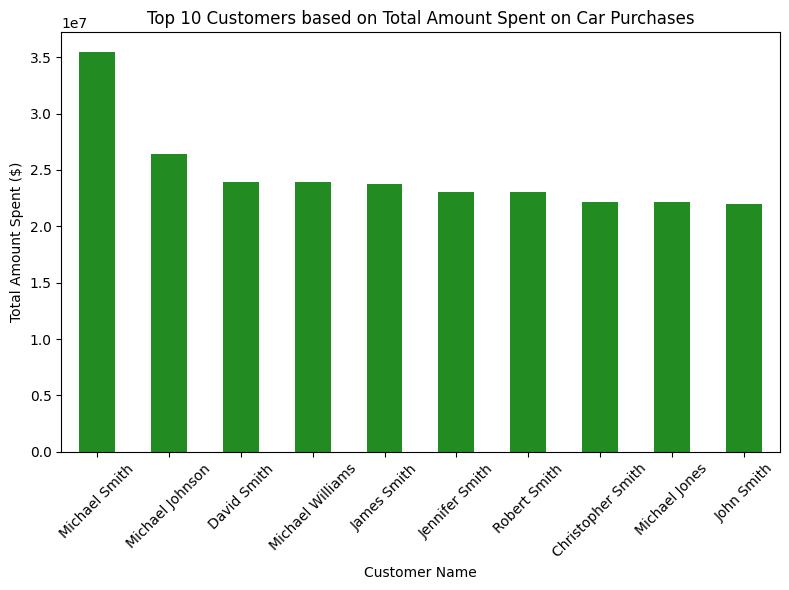

In [25]:
customer_spending = df.groupby('Customer Name')['Sale Price'].sum()
top_customers = customer_spending.sort_values(ascending=False).head(10) 
plt.figure(figsize=(8, 6))
top_customers.plot(kind='bar', color='forestgreen')
plt.title('Top 10 Customers based on Total Amount Spent on Car Purchases')
plt.xlabel('Customer Name')
plt.ylabel('Total Amount Spent ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The top customers, including Michael Smith, Michael Johnson, and James Smith, contribute significantly to the dealership's total sales revenue. Their substantial spending indicates high-value customers who may exhibit loyalty and repeat purchasing behavior. Analyzing their preferences and purchasing patterns can inform targeted marketing strategies and product offerings, fostering stronger customer relationships and driving sustainable business growth.

#### **Bottom 10 Customers**

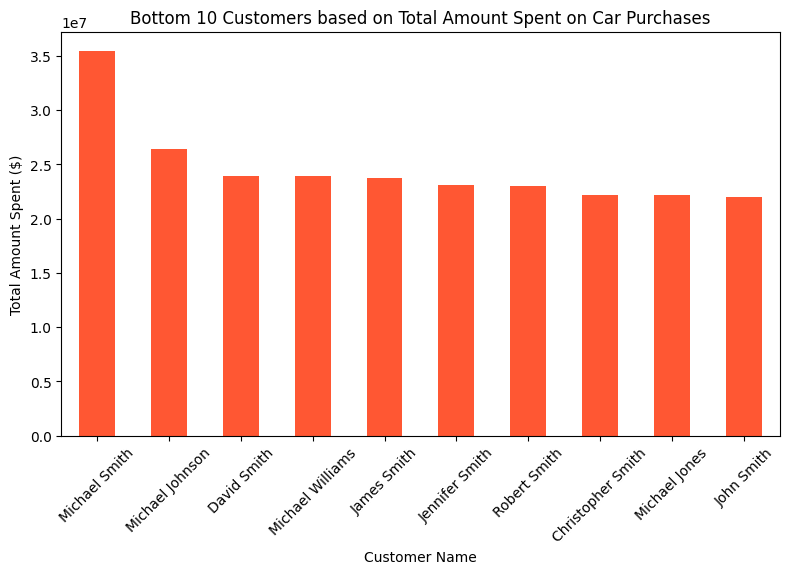

In [26]:
customer_spending = df.groupby('Customer Name')['Sale Price'].sum()
bottom_customers = customer_spending.sort_values(ascending=False).tail(10)  
plt.figure(figsize=(8, 6))
top_customers.plot(kind='bar', color='#FF5733')
plt.title('Bottom 10 Customers based on Total Amount Spent on Car Purchases')
plt.xlabel('Customer Name')
plt.ylabel('Total Amount Spent ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bottom 10 customers, based on their car purchases, exhibit similar spending patterns with purchase amounts ranging between 10,000 dollars and 10,001 dollars. This suggests that these customers may have made relatively smaller purchases compared to others in the dataset.

### **SUMMARY**

-- Sales Price Variability: The average sales price of 30,018.37 dollars with a standard deviation of 11,543.807 dollars indicates significant variability in sales prices, suggesting diverse customer preferences and purchasing power.



-- Sales Trends: December 2022 recorded the highest sales, with relatively consistent levels observed throughout, except for a significant drop in May 2023.



-- Top Performing Salespersons: Salespersons like Michael Smith, Michael Johnson, and James Smith have contributed significantly to total sales revenue, demonstrating exceptional sales performance.



-- Bottom Performing Salespersons: Some salespersons have made modest sales, indicating potential for improvement in their sales strategies and performance.



--  Preferred Car Models: The Silverado emerges as the most preferred car model among customers, with a high sales count. However, the Corolla stands out with the highest average sale price, suggesting different customer preferences for each model.



--  Commission Rate and Commission Earned: A moderate positive correlation coefficient of 0.59 between commission rate and commission earned suggests that higher commission rates tend to result in higher earnings for salespersons.



-- Car Year and Sale Price Correlation: There is a very weak negative correlation (-0.00052) between car year and sale price, indicating that the year the car was made does not significantly affect its sale price.



--  Top Customers: High-value customers like Michael Smith and Michael Johnson contribute significantly to total sales revenue, emphasizing their importance to the dealership.



--  Bottom Customers: Customers with lower purchase amounts may represent a segment with different needs or preferences, requiring targeted marketing or promotional efforts.

### **RECOMMENDATIONS**

The Company Should : 


-- Focus on stocking and promoting the most preferred car models like the Silverado while also considering the profitability of higher-priced models like the Corolla. Adjust inventory levels and marketing efforts accordingly to meet customer demand. Also, consider introducing new car models, financing options, or value-added services to attract and retain customers.



-- Stay informed about market trends, customer preferences, and competitor activities through regular market research and trend analysis. Use these insights to adapt sales strategies and stay ahead of market changes.



-- Develop targeted marketing campaigns to promote high-demand car models and attract new customers. Utilize digital marketing channels to reach potential customers effectively and track campaign performance.



--  Establish recognition programs that acknowledge the achievements of top salespersons, such as "Salesperson of the Month" or "Top Sales Performer of the Quarter, also develop incentive programs that provide rewards for meeting or exceeding sales targets. 



-- Provide additional training and support to bottom-performing salespersons to improve their sales effectiveness.Offer training, coaching, and mentorship opportunities to help these individuals enhance their sales skills and overcome any performance barriers.


--  Strengthen relationships with customers by offering personalized services, loyalty programs, and incentives. Implement customer feedback mechanisms to gather insights and tailor offerings to meet their evolving needs.